## Cálculo do Retorno de uma Carteira de Ações


In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Definição dos ativos financeiros e seus pesos (%) nas carteiras Brasileira e Americana.

In [318]:
br_tickers_n_weights = (
    ("WEGE3.SA", 0.0714),
    ("ARZZ3.SA", 0.0250),
    ("LREN3.SA", 0.0250),
    ("GRND3.SA", 0.0250),
    ("LEVE3.SA", 0.0250),
    ("ABEV3.SA", 0.0500),
    ("MDIA3.SA", 0.0500),
    ("SLCE3.SA", 0.0500),
    ("PSSA3.SA", 0.0714),
    ("B3SA3.SA", 0.0500),
    ("ITUB3.SA", 0.0714),
    ("BBAS3.SA", 0.0714),
    ("RADL3.SA", 0.0500),
    ("ODPV3.SA", 0.0250),
    ("FLRY3.SA", 0.0250),
    ("HYPE3.SA", 0.0250),
    ("VIVT3.SA", 0.0500),
    ("SAPR3.SA", 0.0250),
    ("CPFE3.SA", 0.0714),
    ("EGIE3.SA", 0.0714),
    ("EQTL3.SA", 0.0714),
)

usa_tickers_n_weights = (
    ("MMM", 0.03571428571),
    ("WST", 0.03571428571),
    ("PG", 0.03571428571),
    ("JPM", 0.03571428571),
    ("TXN", 0.03571428571),
    ("ROST", 0.03571428571),
    ("JNJ", 0.03571428571),
    ("PAYX", 0.03571428571),
    ("FAST", 0.03571428571),
    ("EXPD", 0.03571428571),
    ("NKE", 0.03571428571),
    ("DIS", 0.03571428571),
    ("TTC", 0.03571428571),
    ("AAPL", 0.03571428571),
    ("UNH", 0.03571428571),
    ("ADBE", 0.03571428571),
    ("GOOGL", 0.03571428571),
    ("COST", 0.03571428571),
    ("ANSS", 0.03571428571),
    ("HD", 0.03571428571),
    ("ACN", 0.03571428571),
    ("BLK", 0.03571428571),
    ("MSFT", 0.03571428571),
    ("VNQ", 0.03571428571),
    ("VOO", 0.03571428571),
    ("VIOV", 0.03571428571),
    ("VBR", 0.03571428571),
    ("VPL", 0.03571428571),
)

br_index_ticker = "^BVSP"

usa_index_ticker = "^GSPC"

Download dos dados dos ativos financeiros a partir do Yahoo Finance a partir de 02/02/2011.

In [319]:
br_stock_data = pd.DataFrame()
br_index_data = pd.DataFrame()
usa_stock_data = pd.DataFrame()
usa_index_data = pd.DataFrame()
start_date: str = "2011-02-02"
end_date: str = datetime.now().strftime("%Y-%m-%d")

for t in br_tickers_n_weights:
    ticker: str = t[0]
    br_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_tickers_n_weights:
    ticker: str = t[0]
    usa_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

br_index_data[br_index_ticker]: dict = yf.download(
    br_index_ticker, progress=False, start=start_date, end=end_date
)["Adj Close"]

usa_index_data[usa_index_ticker]: dict = yf.download(
    usa_index_ticker,
    progress=False,
    start=start_date,
    end=end_date,
)["Adj Close"]

---


### Gráficos

Gráfico Normalizado das Ações Brasileiras:

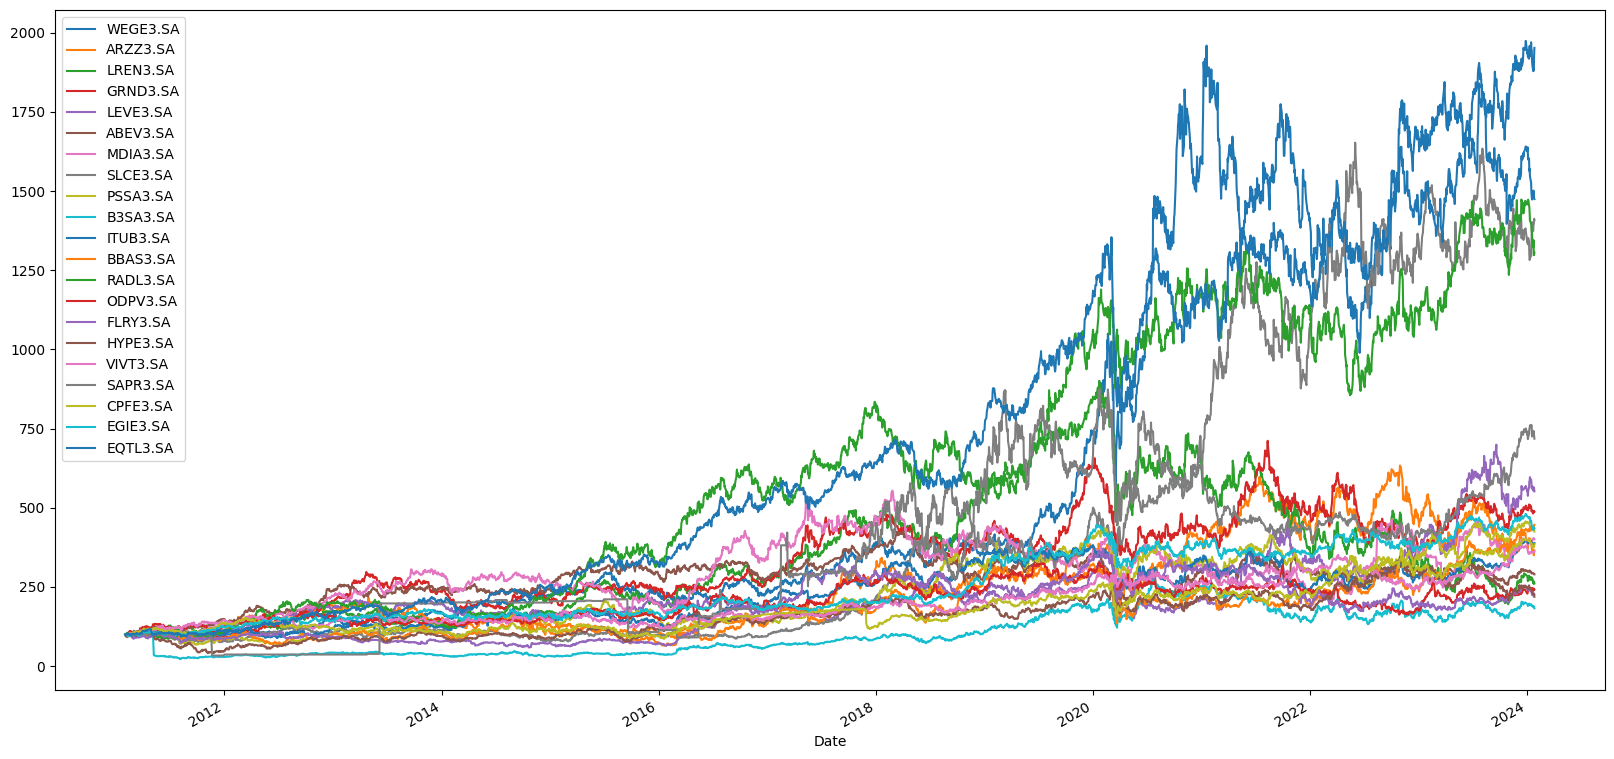

In [320]:
(br_stock_data / br_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Brasileiro:

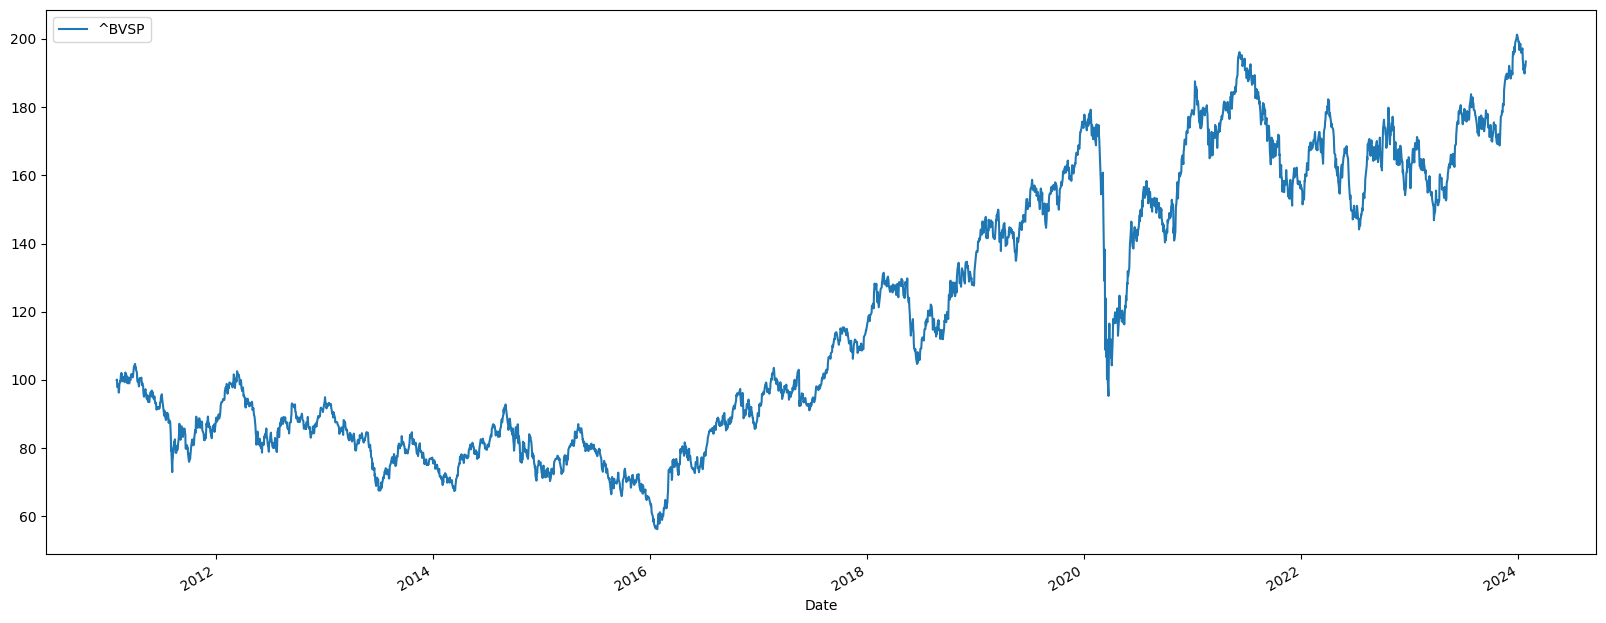

In [321]:
(br_index_data / br_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

Gráfico Normalizado das Ações Americanas:

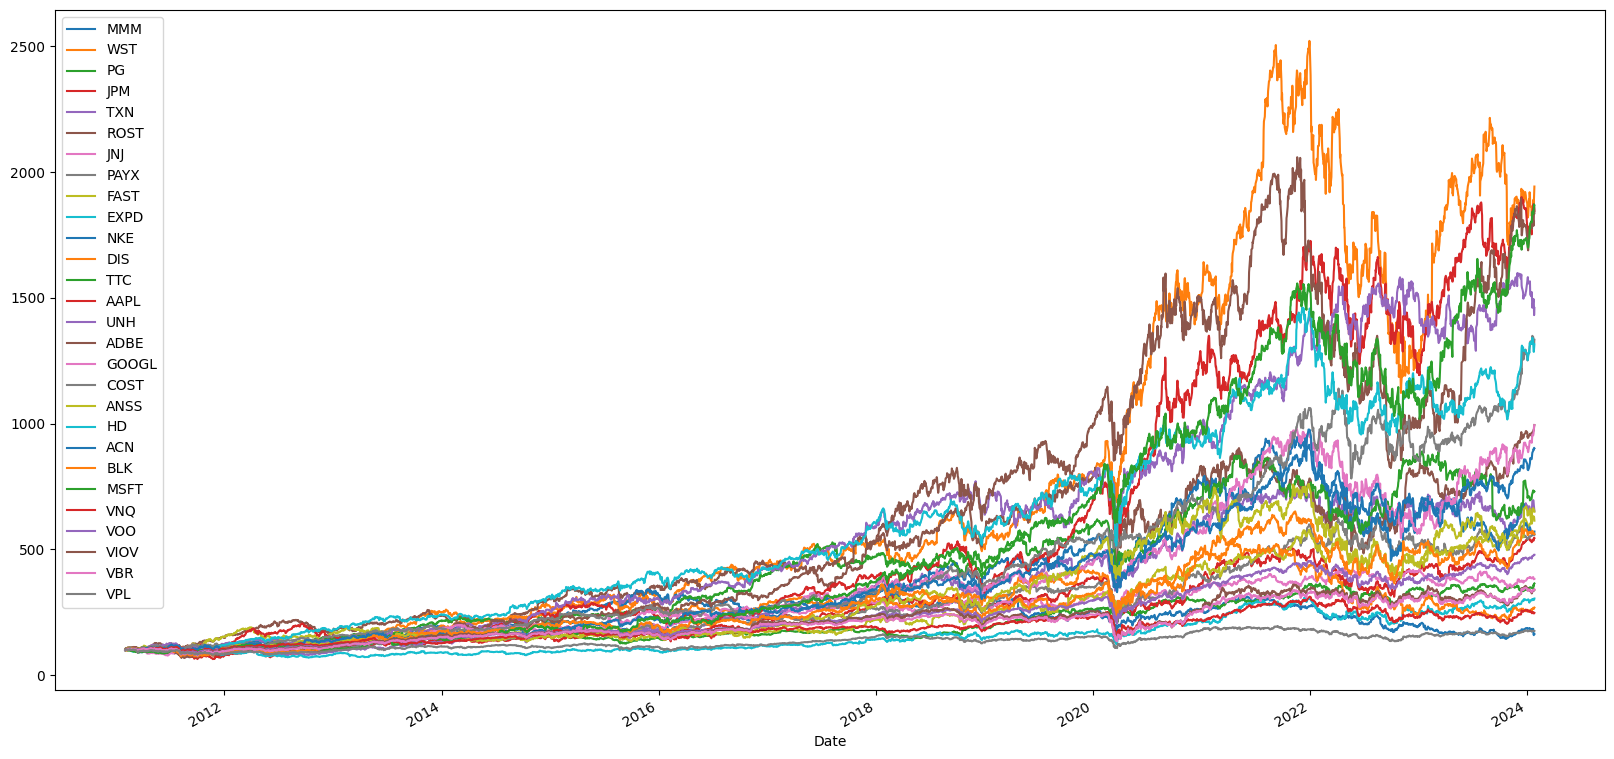

In [322]:
(usa_stock_data / usa_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Americano:

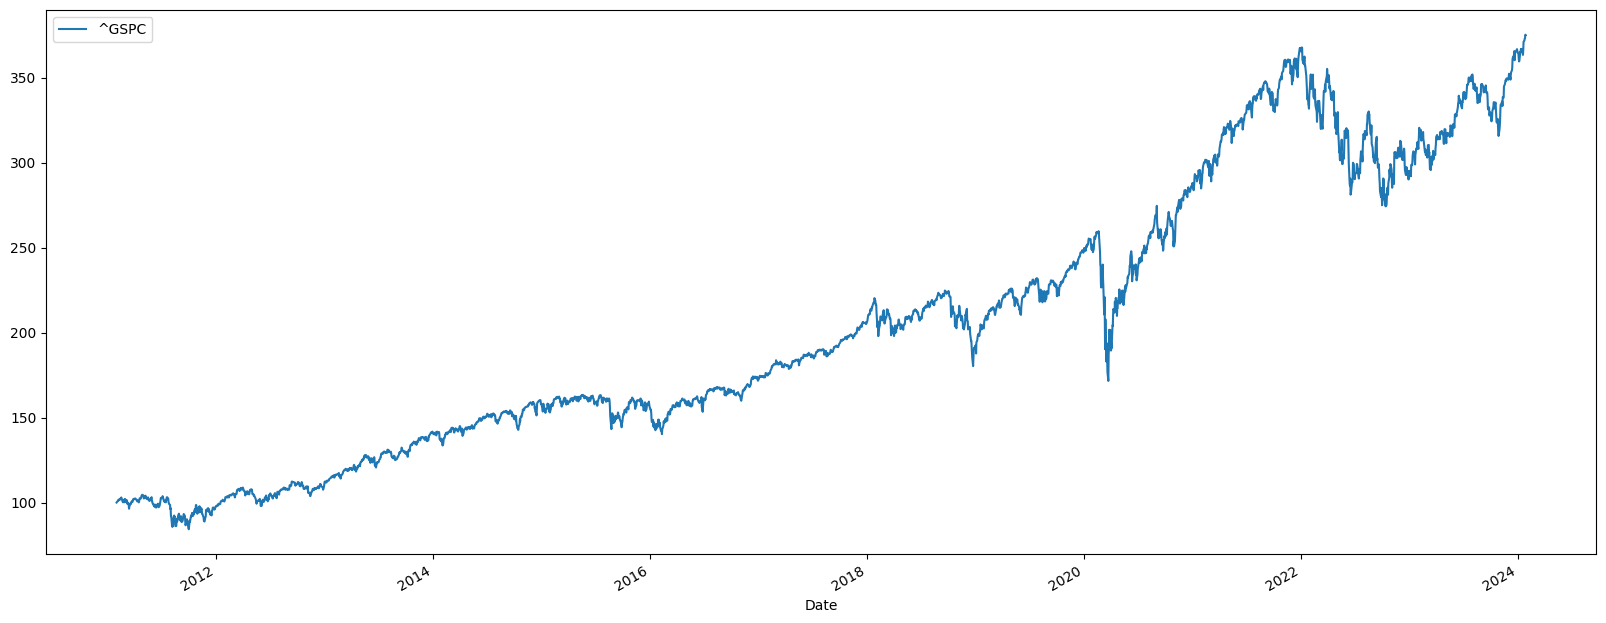

In [323]:
(usa_index_data / usa_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

---


### Calculando o Retorno Médio de uma Carteira de Ações


Calcular o retorno simples dos ativos financeiros da carteira e armazenar os resultados em uma nova tabela.


In [324]:
br_index_returns = (br_index_data / br_index_data.shift(1)) - 1
br_stock_returns = (br_stock_data / br_stock_data.shift(1)) - 1

usa_index_returns = (usa_index_data / usa_index_data.shift(1)) - 1
usa_stock_returns = (usa_stock_data / usa_stock_data.shift(1)) - 1

Armazenar os pesos dos ativos financeiros das carteiras para que se possa calcular o produto escalar dos retornos anuais com seus respectivos pesos.


In [325]:
br_weights = np.array([tw[1] for tw in br_tickers_n_weights])
usa_weights = np.array([tw[1] for tw in usa_tickers_n_weights])

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Brasileira.

In [326]:
br_index_annual_returns = br_index_returns.mean() * 250
br_stock_annual_returns = br_stock_returns.mean() * 250
br_stock_annual_returns

WEGE3.SA    0.259090
ARZZ3.SA    0.178891
LREN3.SA    0.147386
GRND3.SA    0.172216
LEVE3.SA    0.190918
ABEV3.SA    0.116496
MDIA3.SA    0.163995
SLCE3.SA    0.269603
PSSA3.SA    0.157102
B3SA3.SA    0.149122
ITUB3.SA    0.148795
BBAS3.SA    0.197638
RADL3.SA    0.249230
ODPV3.SA    0.117821
FLRY3.SA    0.113623
HYPE3.SA    0.116974
VIVT3.SA    0.139784
SAPR3.SA    0.504998
CPFE3.SA    0.143673
EGIE3.SA    0.142103
EQTL3.SA    0.267005
dtype: float64

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Americana.

In [327]:
usa_index_annual_returns = usa_index_returns.mean() * 250
usa_stock_annual_returns = usa_stock_returns.mean() * 250
usa_stock_annual_returns

MMM      0.063267
WST      0.263590
PG       0.114234
JPM      0.168103
TXN      0.179949
ROST     0.220236
JNJ      0.117202
PAYX     0.157247
FAST     0.178797
EXPD     0.114485
NKE      0.171953
DIS      0.109911
TTC      0.181800
AAPL     0.263093
UNH      0.236872
ADBE     0.271169
GOOGL    0.212503
COST     0.219242
ANSS     0.180809
HD       0.224714
ACN      0.197857
BLK      0.170277
MSFT     0.258155
VNQ      0.090380
VOO      0.134971
VIOV     0.118681
VBR      0.116019
VPL      0.057758
dtype: float64

Calcular o produto escalar dos retornos anuais e seus pesos, em seguida, exibir o resultado percentual.


In [328]:
for i in (
    (
        "Rentabilidade Média Anual do Portfólio BR:",
        br_stock_annual_returns,
        br_weights,
    ),
    ("Rentabilidade Média Anual do Índice BR:", br_index_annual_returns, [1]),
    (
        "\nRentabilidade Média Anual do Portfólio USA:",
        usa_stock_annual_returns,
        usa_weights,
    ),
    ("Rentabilidade Média Anual do Índice USA:", usa_index_annual_returns, [1]),
):
    produto_escalar = np.dot(i[1], i[2])
    result = "{0:.2f} %".format(round(produto_escalar, 5) * 100)
    print(i[0], result)

Rentabilidade Média Anual do Portfólio BR: 18.69 %
Rentabilidade Média Anual do Índice BR: 8.10 %

Rentabilidade Média Anual do Portfólio USA: 17.12 %
Rentabilidade Média Anual do Índice USA: 11.64 %


O retorno desta carteira é satisfatório?
